In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigh
from numpy.linalg import inv
from scipy.linalg import eigh_tridiagonal
from numba import njit

## OSCILADOR HARMÔNICO QUÂNTICO

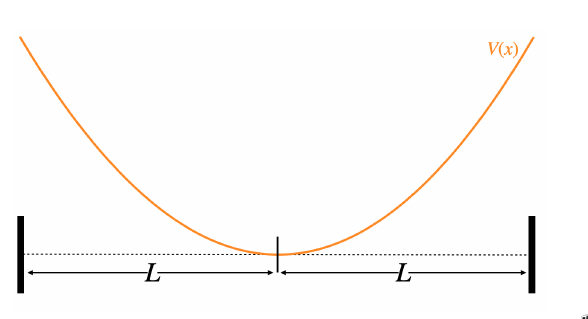

Os estados próprios desta partícula na caixa são soluções da seguinte equação de Schrödinger independente do tempo,


\begin{equation}
-\frac{\hbar^{2}}{2M}\frac{d^{2}}{dx^{2}}\Psi_{E}(x)+\frac{1}{2}M\omega^{2}x^{2}\Psi_{E}(x)=E\Psi_{E}(x),\label{eq:Schrodinger}
\end{equation}
onde $E$ e $\Psi_{E}(x)$ são, respectivamente, a energia própria
e a correspondente função de onda própria. As paredes impenetráveis
da caixa podem ser impostas em qualquer estado $\psi\left(x\right)$
através da condição $\psi\left(\pm L\right)\!=\!0$.

Adimensionalizando a primeira equação:
$$
-\frac{\hbar^{2}}{2M}\frac{d^{2}}{dx^{2}}\Psi_{E}(x)+\frac{1}{2}M\omega^{2}x^{2}\Psi_{E}(x)=E \Psi_{E}(x)
$$
Obtemos, assim:

$$
\frac{d^{2}}{dx^{2}}\Psi'{E}(x) =\frac{d^{2}}{dx^{2}}\Psi{E}(x) L_{0}^2 = \Psi_{E}(x)  \left[ x'^2-\left(2\frac{E}{E_{0}}\right)\right]
$$
Onde $x' = \frac{x}{L_{0}}$ é a unidade adimensionalizada de comprimento, e $\Psi'_{E}$ é a função $\Psi$ adimensionalizada.



Para a Equação $\Phi_{n}(x)$, obtemos:
$$
\begin{eqnarray*}
\Phi'{n}\left(x\right) = \Phi{n} \sqrt{L_{0}} = & = & \begin{cases}
\frac{1}{\sqrt{\ell}}\cos\left(\frac{\pi\left(n+1\right)}{2\ell}x'\right) & n\,\,\,\text{par}\\
\frac{1}{\sqrt{\ell}}\sin\left(\frac{\pi\left(n+1\right)}{2\ell}x'\right) & n\,\,\,\text{ímpar}
\end{cases}
\end{eqnarray*}
$$
Onde $x' = \frac {x}{L_0}$, e $\Phi'{n}$ é a função $\Phi{n}$ adimensionalizada.

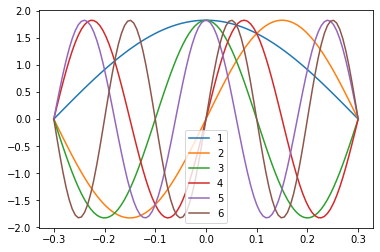

In [2]:
l = 0.3
@njit
def sincos(x, n, l):
    if n % 2 == 0:
        return (1/np.sqrt(l))*np.cos((np.pi*(n+1)*x)/(2*l))
    if n % 2 != 0:
        return (1/np.sqrt(l))*np.sin((np.pi*(n+1)*x)/(2*l))
    
c = np.linspace(-0.3, 0.3, 100)
for i in range(6):
    plt.plot(c, [sincos(j,i,l) for j in c], label = f'{i+1}')
    plt.legend()

Substituindo $x_{0}=L/2$ e $\sigma=L/2$ na equação de $\Psi$, e simplificando, obtemos:

$$
\Psi(x) = A  exp \left(\frac{-{2} \left (x' - \frac{\ell}{2}\right) ^2 }{\ell^2} \right) cos \left( \frac{\pi x'}{2 \ell} \right)
$$

Substituindo $\ell=0.3$, e calculando a normalização $\int_{-\ell}^{\ell} |\Psi^2(x)| dx = 1$

Obtemos que $A = 2.763753976662478$.

O valor de a1 = 0.45485978699347157 
O valor de a2 = 0.05281725668630673 
O valor de a4 = -0.0240002191082404 
O valor de a8 = -0.0023731509534050126 
O valor de a16 = -0.00032828679099832625 
O valor de a32 = -4.528991657127479e-05 


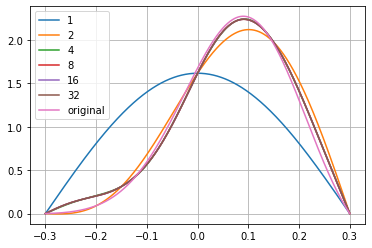

In [3]:
A = 2.763753976662478
l = 0.3
@njit
def simpson(n,a, b, N, l):
    def f(x,n):
        return (A*np.exp((-2*(x - 0.3/2)**2)/0.3**2)*np.cos((np.pi*x)/0.6)) * sincos(x,n, l)
    h = (b-a)/N
    s = f(a,n) + f(b,n) + 4*f(b-h,n)
    for k in range(1, N//2):
        s += 4*f(a + (2*k-1)*h,n) + 2*f(a+2*k*h,n)
    I = h/3*s
    return I

l = [1, 2, 4, 8, 16, 32]
for t in l:
    print(f'O valor de a{t} = {simpson(t,-0.3, 0.3, 100, 0.3)} ')

def psi(x):
    return A*np.exp((-2*(x - 0.15)**2)/((0.3)**2))*np.cos((np.pi/0.6)*x)

Xs = np.linspace(-0.3, 0.3, 1000)
N = [1,2,4,8,16,32]
Z = np.zeros(1000)

for a in N:
    for i in range(a):
        y = [simpson(i, -0.3, 0.3, 100, 0.3)*sincos(x, i, 0.3) for x in Xs]
    for i, j in enumerate(y):
        for d, b in enumerate(Z):
            if i == d:
                Z[d] = y[i] + Z[d]
        
    plt.plot(Xs, Z, label = f'{a}')

plt.plot(Xs, [psi(xi) for xi in Xs], label = 'original')
plt.legend()
plt.grid()
plt.show()

A própria equação de Schrödinger também pode ser expressa à custa
das funções $\Phi_{n}$. Quando expressa nesta base, toma a forma 

$$
\sum_{n=0}^{\infty}H_{nm}a_{m}=\varepsilon a_{n}
$$
que é um problema de valores próprios, onde $\varepsilon$ (o valor
próprio) é a energia em unidades adimensionais e $H$ define a matriz
hamiltoniana. Os elementos da matriz hamiltoniana são obtidos por 

$$
H_{nm}=\int_{-L}^{L}dx\Phi_{n}^{*}\left(x\right)\left[-\frac{\hbar^{2}}{2M}\frac{d^{2}}{dx^{2}}+\frac{1}{2}M\omega^{2}x^{2}\right]\Phi_{m}\left(x\right)
$$

In [4]:
@njit
def Hamilton(N,l):
    H = np.zeros((N,N))
    for m in range(N): 
        for n in range(N): 
            if (m + n)%2 == 0:
                if m == n:
                    H[m][n]= ((1/3)- (2/(np.pi**2*(m+1)**2))) + (((np.pi**2)*(m+1)**2)/(4*l**4))
                if m != n:
                    H[m][n]= (32*(m+1)*(n+1)) / ((np.pi**2)*((m-n)**2)*((m+n+2)**2)) * ((-1)** ((m+3*n)/2))

    return H
Hamilton(4,20)

array([[ 0.13070639,  0.        , -0.15198178,  0.        ],
       [ 0.        ,  0.28273443,  0.        , -0.18012655],
       [-0.15198178,  0.        ,  0.31095631,  0.        ],
       [ 0.        , -0.18012655,  0.        ,  0.32091493]])

In [8]:
def QR_g(A):
    M = len(A)
    Q = np.zeros([M,M])
    R = np.zeros([M,M])
    for i in range(M):
        v = A[:,i] - np.dot(Q[:,:i] , np.dot(A[:,i], Q[:,:i]))
        vv = np.linalg.norm(v)
        Q[:,i] = v/vv
        R[i, i:] = np.dot(Q[:,i], A[:,i:])
    return Q,R

def eigvals(N, l):
    A = Hamilton(N,l)
    A_new = np.copy(A)
    V = np.identity(N)
    V2 = np.identity(N)
    for i in range(1000):
        V = V2
        A = A_new
        Q, R = QR_g(A)
        A_new = np.dot(R,Q)
        V2 = np.dot(V,Q)
    autoval = [A_new [j,j] for j in range(N)]
    autovec = [V2[:,j] for j in range(N)]
    autoval, autovec = zip(*sorted(zip(autoval,autovec)))
    return autoval, autovec

É visto que, quanto maior o valor de $\ell$ os níveis permitidos de energia caem drasticamente, porque ao aumentar $\ell$ aumentamos a incerteza de sua posição, o que está de acordo com o princípio da incerteza de Heisenberg. 

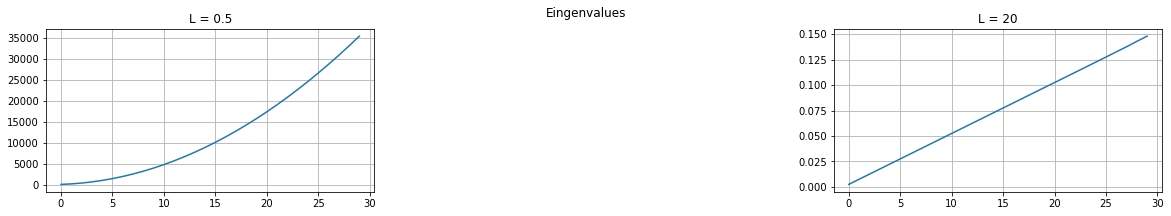

In [6]:
def eigenvalues_30(N, l):
    valores, vetores = eigvals(N, l)
    return valores[0:30]

figura= plt.figure(figsize=(20,3))
figura.suptitle('Eingenvalues')             
figura.add_subplot(131)                      
plt.plot(eigenvalues_30(100, 0.5))
plt.grid()
plt.title('L = 0.5')
figura.add_subplot(133)
plt.plot(eigenvalues_30(100, 20))
plt.grid()
plt.title('L = 20')
plt.show()

A medida que $\ell$ aumenta, os autovalores da Hamiltoniana, que são os níveis de energia permitidos, tendem a valores fixos, uma vez que o sistema tende a um oscilador harmonico infinito. O espaçamento dos valores de E deveriam ser igualmente espaçados, o que não ocorre. Isto ocorre pelo facto de N não ser suficientemente grande.

A distribuição de probabilidade para cada nível consiste no número de picos igual ao nível de energia. Para níveis suficientemente grandes, a distribuição se parece com ao de um oscilador clássico, com menor probabilidade no centro e maior nos extremos

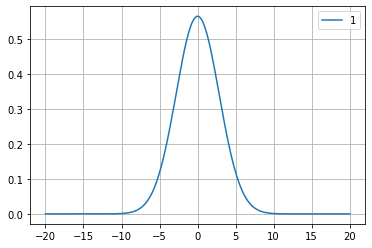

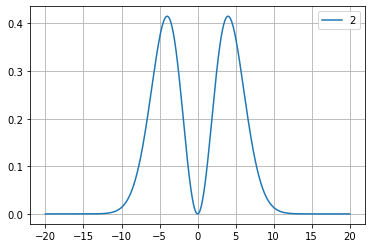

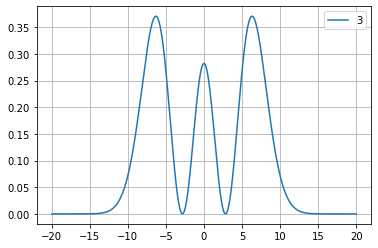

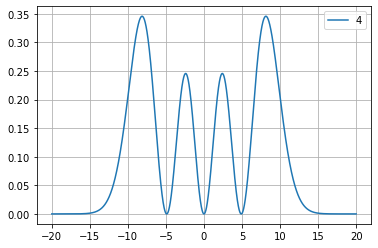

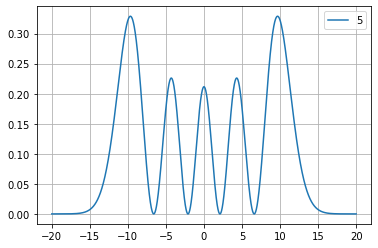

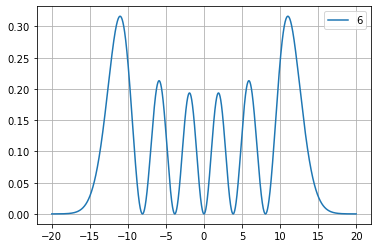

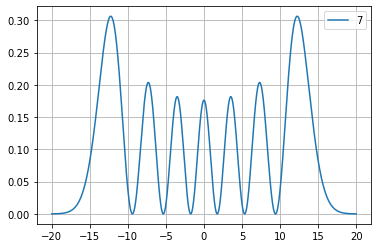

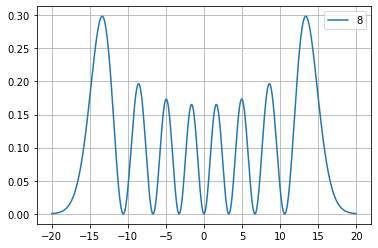

In [7]:
l = 20
Xs = np.linspace(-l, l , 10000)
X, V = eigvals(100,20)
@njit
def sincos(x, n, l):
    if n%2 == 0:
        return (1/np.sqrt(l)*np.cos((np.pi*(n+1)*x)/(8*l)))
    else:
        return (1/np.sqrt(l)*np.sin((np.pi*(n+1)*x)/(8*l)))
@njit
def psi2(x, n):
    s = 0
    for i in range(len(V[0])):
        s += V[n][i] * (sincos(x, i, l))
    return s**2

for i in range(8):
    plt.plot(Xs, [psi2(a, i) for a in Xs], label = f'{i+1}')
    plt.legend()
    plt.grid()
    plt.show()